<a href="https://colab.research.google.com/github/RafsanJany-44/Research-NREM-REM/blob/main/Final_Res__RF_Tunning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import numpy as np
import pandas as pd

dataset=pd.read_csv("https://raw.githubusercontent.com/RafsanJany-44/Research-NREM-REM/main/dataset/REM_NREM.csv")


target="Sleep_Stage"

classes = np.array(sorted(list(set(dataset[target]))))


In [16]:
!pip install imbalanced-learn

from imblearn.over_sampling import SMOTE

def balance(X_temp, y_temp):
  smote = SMOTE()
  X_temp, y_temp= smote.fit_resample(X_temp, y_temp)

  return pd.concat([pd.DataFrame(X_temp), pd.DataFrame(y_temp)], axis=1)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
dataset.head()

,Sleep_Stage,MeanP_Alpha_F4,MedianF_Alpha_F4,MeanF_Alpha_F4,Spectral Edge_Alpha_F4,PeakF_Alpha_F4,MeanP_Beta_F4,MedianF_Beta_F4,MeanF_Beta_F4,Spectral Edge_Beta_F4,...,MeanP_Delta_O2,MedianF_Delta_O2,MeanF_Delta_O2,Spectral Edge_Delta_O2,PeakF_Delta_O2,MeanP_Gamma_O2,MedianF_Gamma_O2,MeanF_Gamma_O2,Spectral Edge_Gamma_O2,PeakF_Gamma_O2
0,NREM,0.00034,10.11512,17.85756,17.48293,10.24000,0.00047,17.73268,25.35024,27.47317,...,0.00112,0.74927,6.36878,2.87220,0.62439,0.000076,32.71805,43.83220,49.95122,49.95122
1,NREM,0.00035,10.73951,17.60780,17.10829,9.11610,0.00048,16.85854,25.22537,26.97366,...,0.00070,0.99902,6.86829,3.62146,0.74927,0.000072,32.09366,44.33171,49.95122,49.95122
2,NREM,0.00035,9.36585,17.60780,16.98341,9.24098,0.00042,17.35805,26.09951,28.47220,...,0.00077,1.49854,6.49366,4.12098,0.74927,0.000069,33.09268,43.95707,49.95122,49.95122
3,NREM,0.00050,10.36488,16.60878,15.85951,7.99220,0.00053,15.48488,24.10146,25.72488,...,0.00130,1.87317,6.11902,3.74634,0.37463,0.000070,31.59415,42.83317,49.95122,49.95122
4,NREM,0.00072,9.36585,15.98439,15.48488,7.99220,0.00067,15.11024,22.22829,23.22732,...,0.00123,1.49854,6.61854,3.74634,0.74927,0.000060,29.47122,45.08098,49.95122,49.95122


In [18]:
set(list(dataset[target]))

{'NREM', 'REM'}

In [19]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
dataset[target]=encoder.fit_transform(dataset[target])

In [20]:

set(list(dataset[target]))

{0, 1}

In [21]:
X = dataset.loc[:, dataset.columns!=target]
y = dataset[target]

In [23]:
#Splitting dataset into training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [24]:
new_dataset=balance(X_train,y_train)

X_train = new_dataset.loc[:, new_dataset.columns!=target]
y_train = new_dataset[target]

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=150
k_range = range (1,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(n_estimators=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best n_estimators:")
best_estimator=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_estimator)

  1%|          | 1/150 [00:01<02:33,  1.03s/it]

1/150 round completed......................... Accurecy: 0.8427048260381593


  1%|▏         | 2/150 [00:03<04:02,  1.64s/it]

2/150 round completed......................... Accurecy: 0.8793490460157127


  2%|▏         | 3/150 [00:06<05:36,  2.29s/it]

3/150 round completed......................... Accurecy: 0.8800224466891133


  3%|▎         | 4/150 [00:10<07:13,  2.97s/it]

4/150 round completed......................... Accurecy: 0.8973625140291807


  3%|▎         | 5/150 [00:15<08:56,  3.70s/it]

5/150 round completed......................... Accurecy: 0.8969135802469136


  4%|▍         | 6/150 [00:21<10:47,  4.49s/it]

6/150 round completed......................... Accurecy: 0.9049382716049382


  5%|▍         | 7/150 [00:28<12:39,  5.31s/it]

7/150 round completed......................... Accurecy: 0.9038159371492704


  5%|▌         | 8/150 [00:36<14:34,  6.16s/it]

8/150 round completed......................... Accurecy: 0.9112233445566779


  4%|▍         | 1/23 [00:35<13:10, 35.92s/it]

28/50 round completed......................... Accurecy: 0.8634854771784233


  9%|▊         | 2/23 [01:11<12:34, 35.94s/it]

29/50 round completed......................... Accurecy: 0.8625518672199171


 13%|█▎        | 3/23 [01:47<11:59, 35.96s/it]

30/50 round completed......................... Accurecy: 0.862240663900415


 17%|█▋        | 4/23 [02:24<11:26, 36.12s/it]

31/50 round completed......................... Accurecy: 0.8616528354080222


 22%|██▏       | 5/23 [03:00<10:49, 36.07s/it]

32/50 round completed......................... Accurecy: 0.8624827109266944


 26%|██▌       | 6/23 [03:36<10:12, 36.04s/it]

33/50 round completed......................... Accurecy: 0.8619640387275243


 30%|███       | 7/23 [04:12<09:36, 36.04s/it]

34/50 round completed......................... Accurecy: 0.8627939142461964


 35%|███▍      | 8/23 [04:48<09:01, 36.12s/it]

35/50 round completed......................... Accurecy: 0.8621715076071923


 39%|███▉      | 9/23 [05:24<08:25, 36.07s/it]

36/50 round completed......................... Accurecy: 0.8629322268326418


 43%|████▎     | 10/23 [06:00<07:48, 36.07s/it]

37/50 round completed......................... Accurecy: 0.862136929460581


 48%|████▊     | 11/23 [06:36<07:12, 36.04s/it]

38/50 round completed......................... Accurecy: 0.8617565698478562


 52%|█████▏    | 12/23 [07:12<06:37, 36.16s/it]

39/50 round completed......................... Accurecy: 0.8621023513139696


 57%|█████▋    | 13/23 [07:48<06:00, 36.09s/it]

40/50 round completed......................... Accurecy: 0.862448132780083


 61%|██████    | 14/23 [08:24<05:24, 36.05s/it]

41/50 round completed......................... Accurecy: 0.862448132780083


 65%|██████▌   | 15/23 [09:00<04:48, 36.03s/it]

42/50 round completed......................... Accurecy: 0.862448132780083


 70%|██████▉   | 16/23 [09:36<04:11, 35.99s/it]

43/50 round completed......................... Accurecy: 0.862448132780083


 74%|███████▍  | 17/23 [10:13<03:36, 36.09s/it]

44/50 round completed......................... Accurecy: 0.862448132780083


 78%|███████▊  | 18/23 [10:48<03:00, 36.05s/it]

45/50 round completed......................... Accurecy: 0.862448132780083


 83%|████████▎ | 19/23 [11:24<02:24, 36.00s/it]

46/50 round completed......................... Accurecy: 0.862448132780083


 87%|████████▋ | 20/23 [12:00<01:47, 35.98s/it]

47/50 round completed......................... Accurecy: 0.862448132780083


 91%|█████████▏| 21/23 [12:37<01:12, 36.07s/it]

48/50 round completed......................... Accurecy: 0.862448132780083


 96%|█████████▌| 22/23 [13:13<00:36, 36.04s/it]

49/50 round completed......................... Accurecy: 0.862448132780083


100%|██████████| 23/23 [13:48<00:00, 36.04s/it]

50/50 round completed......................... Accurecy: 0.862448132780083
The best Depth:
28


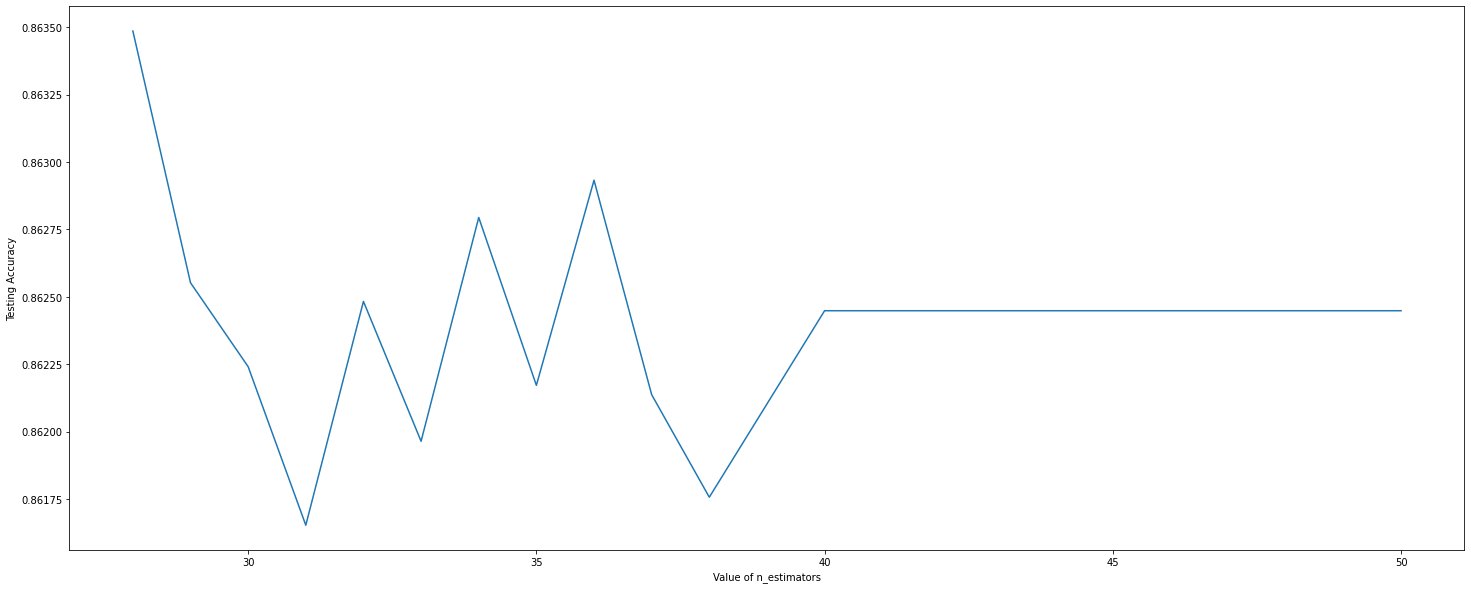

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from tqdm import tqdm
N=50
k_range = range (28,N+1)
scores={}
scores_list = []
for k in tqdm(k_range):
  classifier = RandomForestClassifier(max_depth=k,random_state=0)
  classifier.fit(X_train, y_train)
  y_pred=classifier.predict(X_test)
  scores[k] = accuracy_score(y_test,y_pred)
  scores_list.append(accuracy_score(y_test,y_pred))
  print(str(k)+"/"+str(N)+" round completed......................... Accurecy: "+str(accuracy_score(y_test,y_pred)))



%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (25,10))
plt.plot(k_range,scores_list)
plt.xlabel('Value of n_estimators')
plt.ylabel ('Testing Accuracy')



print("The best Depth:")
best_depth=list(scores.keys())[scores_list.index(max(scores_list))]
print(best_depth)

In [12]:
from sklearn.ensemble import RandomForestClassifier
rf_estimator = RandomForestClassifier(n_estimators=best_estimator,random_state=0)
rf_estimator.fit(X_train, y_train)
y_pred=rf_estimator.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14132   328]
 [ 3575 10885]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     14460
           1       0.97      0.75      0.85     14460

    accuracy                           0.87     28920
   macro avg       0.88      0.87      0.86     28920
weighted avg       0.88      0.87      0.86     28920

Accurecy:  0.8650414937759336


In [13]:
from sklearn.ensemble import RandomForestClassifier
rf_depth = RandomForestClassifier(max_depth=best_depth,random_state=0)
rf_depth.fit(X_train, y_train)
y_pred=rf_depth.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14150   310]
 [ 3638 10822]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     14460
           1       0.97      0.75      0.85     14460

    accuracy                           0.86     28920
   macro avg       0.88      0.86      0.86     28920
weighted avg       0.88      0.86      0.86     28920

Accurecy:  0.8634854771784233


In [14]:
from sklearn.ensemble import RandomForestClassifier
rf_all = RandomForestClassifier(n_estimators=best_estimator,max_depth=best_depth,random_state=0)
rf_all.fit(X_train, y_train)
y_pred=rf_all.predict(X_test)


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test,y_pred))
print("Accurecy: ",accuracy_score(y_test, y_pred))

[[14134   326]
 [ 3559 10901]]
              precision    recall  f1-score   support

           0       0.80      0.98      0.88     14460
           1       0.97      0.75      0.85     14460

    accuracy                           0.87     28920
   macro avg       0.88      0.87      0.86     28920
weighted avg       0.88      0.87      0.86     28920

Accurecy:  0.8656639004149378
